In [1]:
from importlib import reload

import torch
from torch import nn
from torch.utils.data import DataLoader

%load_ext tensorboard

import dataset, model, trainer

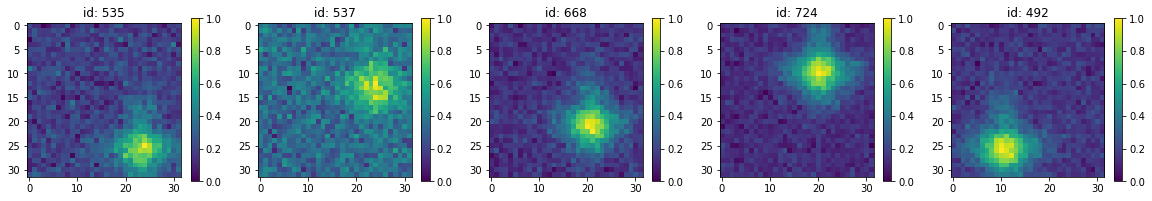

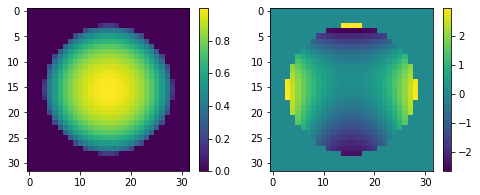

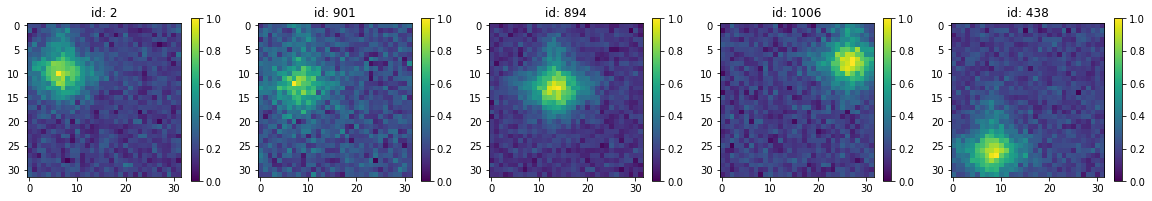

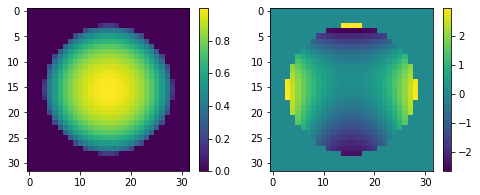

In [2]:
training_data = dataset.FourierOptics2DPSFDataset(length=1024, psf_zerns={4:0, 5:3, 7:0.5})#, noise_params={} )
# training_data = dataset.FourierOptics2DPSFDataset(length=1024, psf_zerns={}, noise_params={} )
dataset.inspect_psfs(training_data)

train_dataloader = DataLoader(training_data, batch_size=1024, shuffle=True)


valid_data = dataset.FourierOptics2DPSFDataset(length=1024, psf_zerns={4:0, 5:3, 7:0.5})#, noise_params={} )
dataset.inspect_psfs(valid_data)

valid_dataloader = DataLoader(valid_data, batch_size=1024, shuffle=True)

In [22]:
reload(trainer)


# fitting_model =  model.FourierOptics2DModel()
fitting_model = model.Template2DModel()
optimizer = torch.optim.Adam(fitting_model.parameters(), lr=1e-2)

training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader)

# training.train_single_epoch()
# training.validate()



CUDA not available. Defaulting to CPU
Device: cpu


In [ ]:
training.train_and_validate(100000)

----------------------------------------------------------------------------------------------------
Starting training Epoch # 0
Epoch # 0, Batch # 0 (1024/1024), loss = 0.087489
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Starting training Epoch # 1
Epoch # 1, Batch # 0 (1024/1024), loss = 0.086992
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Starting training Epoch # 2
Epoch # 2, Batch # 0 (1024/1024), loss = 0.086676
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Starting training Epoch # 3
Epoch # 3, Batch # 0 (1024/1024

In [ ]:
%tensorboard --logdir=runs

In [ ]:
from matplotlib import pyplot as plt
suppls = fitting_model.get_suppl()
fig, axes = plt.subplots(1, len(suppls), figsize=(9, 3))
for i, (key, data) in enumerate(suppls.items()):
    im=axes[i].imshow(data)
    plt.colorbar(im, ax=axes[i])
# im=axes[1].imshow(suppls[1])